In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
# --- Metrics ---
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# Read data

In [3]:
df = pd.read_csv("df_final_bh_amazonas.csv")

In [4]:
df.head(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,1,1,0,1,0,33.9,20.6,25.912500,89.0,32.0,30,0.0,NaN,68.0,NaN,82.0
1,2015-01-02,Fri,4,1,1,0,0,1,32.9,21.0,26.050000,87.0,38.0,43,0.0,NaN,79.0,NaN,83.0
2,2015-01-03,Sat,5,1,1,1,0,0,33.5,20.2,26.683333,83.0,38.0,23,0.0,NaN,44.0,NaN,83.0
3,2015-01-04,Sun,6,1,1,1,0,0,30.6,22.2,25.641667,81.0,43.0,20,0.0,NaN,49.0,NaN,82.0
4,2015-01-05,Mon,0,2,1,0,0,0,30.8,20.8,25.520833,79.0,36.0,51,0.0,NaN,59.0,NaN,82.0
5,2015-01-06,Tue,1,2,1,0,0,0,29.5,20.5,25.016667,79.0,41.0,23,0.0,NaN,54.0,NaN,82.0
6,2015-01-07,Wed,2,2,1,0,0,0,28.0,19.9,23.925000,78.0,44.0,43,0.0,NaN,54.0,NaN,82.0
7,2015-01-08,Thu,3,2,1,0,0,0,30.4,19.7,24.229167,74.0,30.0,49,NaN,NaN,66.0,NaN,82.0
8,2015-01-09,Fri,4,2,1,0,0,0,30.5,19.6,24.579167,68.0,28.0,39,NaN,NaN,61.0,NaN,82.0
9,2015-01-10,Sat,5,2,1,1,0,0,32.6,20.6,25.887500,73.0,33.0,19,NaN,NaN,51.0,NaN,82.0


In [5]:
df.tail(10)

,Date,DayOfWeek,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,IsDayAfterHoliday,temp_max,temp_min,temp_mean,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1816,2019-12-22,Sun,6,51,12,1,0,0,32.9,20.3,26.037500,84.0,34.0,34,0.0,14.0,NaN,7.0,NaN
1817,2019-12-23,Mon,0,52,12,0,0,0,25.9,19.0,22.291667,91.0,59.0,47,NaN,14.0,NaN,7.0,NaN
1818,2019-12-24,Tue,1,52,12,0,0,0,24.6,17.6,21.175000,91.0,65.0,37,NaN,13.0,NaN,6.0,NaN
1819,2019-12-25,Wed,2,52,12,0,1,0,30.3,17.4,23.525000,91.0,36.0,59,NaN,8.0,NaN,6.0,NaN
1820,2019-12-26,Thu,3,52,12,0,0,1,30.4,20.8,25.000000,79.0,37.0,71,NaN,9.0,NaN,5.0,NaN
1821,2019-12-27,Fri,4,52,12,0,0,0,29.1,19.9,24.016667,83.0,40.0,48,NaN,9.0,NaN,6.0,NaN
1822,2019-12-28,Sat,5,52,12,1,0,0,28.6,19.7,23.245833,88.0,44.0,39,NaN,10.0,NaN,6.0,NaN
1823,2019-12-29,Sun,6,52,12,1,0,0,29.4,18.8,22.333333,90.0,40.0,36,NaN,8.0,NaN,5.0,NaN
1824,2019-12-30,Mon,0,1,12,0,0,0,29.3,18.1,22.958333,84.0,32.0,41,NaN,8.0,NaN,5.0,NaN
1825,2019-12-31,Tue,1,1,12,0,0,0,29.9,18.8,24.045833,79.0,37.0,49,NaN,8.0,NaN,5.0,NaN


In [6]:
df.count()

Date                 1826
DayOfWeek            1826
DayOfWeekNum         1826
WeekOfYear           1826
Month                1826
IsWeekend            1826
IsHoliday            1826
IsDayAfterHoliday    1826
temp_max             1826
temp_min             1826
temp_mean            1826
humidity_max         1826
humidity_min         1826
NUMBER_INT           1826
CO                   1581
MP10                 1457
O3                   1265
MP2.5                1195
SO2                  1091
dtype: int64

### Set features

In [7]:
selected_cols_final = [
    'Date',
    'DayOfWeekNum',
    'WeekOfYear',
    'Month',
    'IsWeekend',
    'IsHoliday',
    'NUMBER_INT',
    # 'SO2',
    'temp_max',
    'temp_min',
    'humidity_max',
]

df_final = df[selected_cols_final].copy()

In [8]:
# add lag
# df_final['SO2_lag1'] = df_final['SO2'].shift(1)
# df_final['SO2_lag2'] = df_final['SO2'].shift(2)
# df_final['SO2_lag3'] = df_final['SO2'].shift(3)

df_final['temp_min_lag1'] = df_final['temp_min'].shift(1)
df_final['temp_min_lag2'] = df_final['temp_min'].shift(2)
df_final['temp_min_lag3'] = df_final['temp_min'].shift(3)

# df_final['humidity_max_lag1'] = df_final['humidity_max'].shift(1)
# df_final['humidity_max_lag2'] = df_final['humidity_max'].shift(2)
# df_final['humidity_max_lag3'] = df_final['humidity_max'].shift(3)

In [9]:
df_final = df_final.dropna()

In [10]:
# Check non-null counts and data types
df_final.info()

# Check descriptive statistics
df_final.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 1823 entries, 3 to 1825
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1823 non-null   object 
 1   DayOfWeekNum   1823 non-null   int64  
 2   WeekOfYear     1823 non-null   int64  
 3   Month          1823 non-null   int64  
 4   IsWeekend      1823 non-null   int64  
 5   IsHoliday      1823 non-null   int64  
 6   NUMBER_INT     1823 non-null   int64  
 7   temp_max       1823 non-null   float64
 8   temp_min       1823 non-null   float64
 9   humidity_max   1823 non-null   float64
 10  temp_min_lag1  1823 non-null   float64
 11  temp_min_lag2  1823 non-null   float64
 12  temp_min_lag3  1823 non-null   float64
dtypes: float64(6), int64(6), object(1)
memory usage: 199.4+ KB


,Date,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,temp_min_lag1,temp_min_lag2,temp_min_lag3
count,1823,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000,1823.000000
unique,1823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2019-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.998903,26.657707,6.532639,0.285793,0.024136,47.806363,28.306089,17.786725,82.257817,17.787493,17.789084,17.790071
std,NaN,2.001920,15.041553,3.445021,0.451915,0.153514,15.627747,3.039403,2.625516,9.232062,2.626018,2.627085,2.627804
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,17.800000,7.300000,42.000000,7.300000,7.300000,7.300000
25%,NaN,1.000000,14.000000,4.000000,0.000000,0.000000,37.000000,26.300000,16.100000,77.000000,16.100000,16.100000,16.100000
50%,NaN,3.000000,27.000000,7.000000,0.000000,0.000000,47.000000,28.500000,18.400000,84.000000,18.400000,18.400000,18.400000
75%,NaN,5.000000,40.000000,10.000000,1.000000,0.000000,59.000000,30.400000,19.700000,90.000000,19.700000,19.700000,19.700000


In [11]:
df_final.dtypes

Date              object
DayOfWeekNum       int64
WeekOfYear         int64
Month              int64
IsWeekend          int64
IsHoliday          int64
NUMBER_INT         int64
temp_max         float64
temp_min         float64
humidity_max     float64
temp_min_lag1    float64
temp_min_lag2    float64
temp_min_lag3    float64
dtype: object

## Train

In [12]:
df_final['Date'] = pd.to_datetime(df_final['Date'])
# df_final = df_final.sort_values(by='Date')

# remove the last 5 days (account for lag ...)
df_final = df_final[:-5]

# Range for training and testing (4 years for training, 1 year for validation)
min_year = df_final['Date'].dt.year.min()
train_mask = df_final['Date'].dt.year < (min_year + 4)
val_mask = df_final['Date'].dt.year == (min_year + 4)



df_train = df_final[train_mask]
df_val = df_final[val_mask]

df_train = df_train.drop(columns=['Date'])
df_val = df_val.drop(columns=['Date'])

X = df_final.drop(columns=['Date', 'NUMBER_INT'])
y = df_final['NUMBER_INT']


X_train = df_train.drop(columns=['NUMBER_INT'])
y_train = df_train['NUMBER_INT']

X_val = df_val.drop(columns=['NUMBER_INT'])
y_val = df_val['NUMBER_INT']

In [13]:
df_train.head()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,temp_min_lag1,temp_min_lag2,temp_min_lag3
3,6,1,1,1,0,20,30.6,22.2,81.0,20.2,21.0,20.6
4,0,2,1,0,0,51,30.8,20.8,79.0,22.2,20.2,21.0
5,1,2,1,0,0,23,29.5,20.5,79.0,20.8,22.2,20.2
6,2,2,1,0,0,43,28.0,19.9,78.0,20.5,20.8,22.2
7,3,2,1,0,0,49,30.4,19.7,74.0,19.9,20.5,20.8


In [14]:
df_train.tail()

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,temp_min_lag1,temp_min_lag2,temp_min_lag3
1456,3,52,12,0,0,60,24.8,18.8,92.0,18.6,18.5,18.5
1457,4,52,12,0,0,61,25.4,18.5,92.0,18.8,18.6,18.5
1458,5,52,12,1,0,30,27.5,17.7,92.0,18.5,18.8,18.6
1459,6,52,12,1,0,26,27.3,18.5,93.0,17.7,18.5,18.8
1460,0,1,12,0,0,61,25.9,19.2,92.0,18.5,17.7,18.5


In [15]:
df_val.head(10)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,temp_min_lag1,temp_min_lag2,temp_min_lag3
1461,1,1,1,0,1,44,27.9,19.2,92.0,19.2,18.5,17.7
1462,2,1,1,0,0,45,31.1,18.9,90.0,19.2,19.2,18.5
1463,3,1,1,0,0,28,30.7,20.4,88.0,18.9,19.2,19.2
1464,4,1,1,0,0,37,25.4,19.0,91.0,20.4,18.9,19.2
1465,5,1,1,1,0,36,30.1,18.6,91.0,19.0,20.4,18.9
1466,6,1,1,1,0,30,31.8,18.8,90.0,18.6,19.0,20.4
1467,0,2,1,0,0,37,31.2,20.9,79.0,18.8,18.6,19.0
1468,1,2,1,0,0,39,29.6,19.7,87.0,20.9,18.8,18.6
1469,2,2,1,0,0,49,29.4,19.0,78.0,19.7,20.9,18.8
1470,3,2,1,0,0,51,29.2,19.7,75.0,19.0,19.7,20.9


In [16]:
df_val.tail(20)

,DayOfWeekNum,WeekOfYear,Month,IsWeekend,IsHoliday,NUMBER_INT,temp_max,temp_min,humidity_max,temp_min_lag1,temp_min_lag2,temp_min_lag3
1801,5,49,12,1,0,32,26.6,20.3,92.0,19.4,19.3,18.6
1802,6,49,12,1,0,26,24.1,18.5,90.0,20.3,19.4,19.3
1803,0,50,12,0,0,51,27.7,18.3,84.0,18.5,20.3,19.4
1804,1,50,12,0,0,56,25.6,19.7,91.0,18.3,18.5,20.3
1805,2,50,12,0,0,49,28.0,19.4,92.0,19.7,18.3,18.5
1806,3,50,12,0,0,50,27.2,19.1,92.0,19.4,19.7,18.3
1807,4,50,12,0,0,44,31.3,18.5,92.0,19.1,19.4,19.7
1808,5,50,12,1,0,43,30.2,18.9,88.0,18.5,19.1,19.4
1809,6,50,12,1,0,28,29.0,20.2,77.0,18.9,18.5,19.1
1810,0,51,12,0,0,49,30.0,18.7,77.0,20.2,18.9,18.5


## Test (10x with cv)

In [17]:
results = []
results30 = []

param_grid = {
    'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160],
    'max_depth': [None, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
    'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
}

In [18]:
for i in range(10):
    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=i),
        param_grid=param_grid,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    print(f"\nRun {i+1} Best Hyperparameters:")
    print("Best Hyperparameters:", grid_search.best_params_)
    print(f"Best R-squared: {grid_search.best_score_:.4f}")

    best_xgb_model = grid_search.best_estimator_
    y_pred = best_xgb_model.predict(X_val)

    # Metrics 1y
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    mape_val = mape(y_val, y_pred)
    smape_val = smape(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    corr = np.corrcoef(y_val, y_pred)[0, 1]

    # Metrics 30d
    y_pred_30d = best_xgb_model.predict(X_val[:30])
    y_val_30 = y_val[:30]
    mse_30d = mean_squared_error(y_val_30, y_pred_30d)
    rmse_30d = np.sqrt(mse_30d)
    mae_30d = mean_absolute_error(y_val_30, y_pred_30d)
    mape_val_30d = mape(y_val_30, y_pred_30d)
    smape_val_30d = smape(y_val_30, y_pred_30d)
    r2_30d = r2_score(y_val_30, y_pred_30d)
    corr_30d = np.corrcoef(y_val_30, y_pred_30d)[0, 1]

    results.append({
        'run': i+1,
        'random_state': i,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape_val,
        'sMAPE': smape_val,
        'R2': r2,
        'Correlation': corr,
        'Best Params': grid_search.best_params_,
        'Best Cross-validated R-squared': grid_search.best_score_
    })

    results30.append({
        'run': i+1,
        'random_state': i,
        'MSE_30d': mse_30d,
        'RMSE_30d': rmse_30d,
        'MAE_30d': mae_30d,
        'MAPE_30d': mape_val_30d,
        'sMAPE_30d': smape_val_30d,
        'R2_30d': r2_30d,
        'Correlation_30d': corr_30d
    })




Run 1 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 60}
Best R-squared: 0.5373

Run 2 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 40}
Best R-squared: 0.5356

Run 3 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 160}
Best R-squared: 0.5351

Run 4 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 140}
Best R-squared: 0.5354

Run 5 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 10, 'n_estimators': 160}
Best R-squared: 0.5356

Run 6 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 160}
Best R-squared: 0.5344

Run 7 Best Hyperparameters:
Best Hyperparameters: {'max_depth': 6, 'min_samples_split': 4, 'n_estimators': 160}
Best R-squared: 0.5368

Run 8 Best Hyperparameters:
Best Hyperparamete

### Results 1y

In [19]:
results_df = pd.DataFrame(results)
results_df

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Params,Best Cross-validated R-squared
0,1,0,121.194552,11.008840,8.266692,15.674863,16.753663,0.493041,0.783931,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.537287
1,2,1,120.144868,10.961061,8.225452,15.648948,16.745078,0.497432,0.787380,"{'max_depth': 6, 'min_samples_split': 6, 'n_es...",0.535580
2,3,2,119.481653,10.930766,8.193726,15.565357,16.627529,0.500206,0.787585,"{'max_depth': 6, 'min_samples_split': 6, 'n_es...",0.535107
3,4,3,119.610993,10.936681,8.181041,15.552552,16.625979,0.499665,0.786941,"{'max_depth': 6, 'min_samples_split': 2, 'n_es...",0.535380
4,5,4,119.984640,10.953750,8.217868,15.622872,16.688888,0.498102,0.787161,"{'max_depth': 6, 'min_samples_split': 10, 'n_e...",0.535637
5,6,5,119.932874,10.951387,8.209132,15.599561,16.682009,0.498319,0.787653,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.534386
6,7,6,120.475955,10.976154,8.255565,15.711902,16.769739,0.496047,0.785597,"{'max_depth': 6, 'min_samples_split': 4, 'n_es...",0.536774
7,8,7,119.937969,10.951619,8.236373,15.686445,16.760146,0.498298,0.788640,"{'max_depth': 6, 'min_samples_split': 4, 'n_es...",0.537376
8,9,8,120.442274,10.974620,8.221847,15.597045,16.690319,0.496188,0.786911,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.533989
9,10,9,119.351428,10.924808,8.171676,15.480087,16.561515,0.500751,0.789194,"{'max_depth': 6, 'min_samples_split': 16, 'n_e...",0.537099


In [20]:
results_df.describe()

,run,random_state,MSE,RMSE,MAE,MAPE,sMAPE,R2,Correlation,Best Cross-validated R-squared
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,120.055721,10.956969,8.217937,15.613963,16.690487,0.497805,0.787099,0.535861
std,3.02765,3.02765,0.546532,0.024921,0.030495,0.070244,0.069071,0.002286,0.001481,0.001216
min,1.00000,0.00000,119.351428,10.924808,8.171676,15.480087,16.561515,0.493041,0.783931,0.533989
25%,3.25000,2.25000,119.691464,10.940358,8.197578,15.573279,16.641149,0.496499,0.786919,0.535175
50%,5.50000,4.50000,119.961305,10.952685,8.219857,15.611216,16.689604,0.498200,0.787271,0.535608
75%,7.75000,6.75000,120.367923,10.971230,8.233643,15.668384,16.751517,0.499329,0.787636,0.537017
max,10.00000,9.00000,121.194552,11.008840,8.266692,15.711902,16.769739,0.500751,0.789194,0.537376


### results 30d

In [21]:
results_df_30 = pd.DataFrame(results30)
results_df_30

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
0,1,0,62.167701,7.884650,6.636475,16.805823,18.463416,0.071523,0.699355
1,2,1,66.192219,8.135860,6.681788,16.801375,18.621082,0.011417,0.690919
2,3,2,63.903718,7.993980,6.620975,16.698033,18.493999,0.045596,0.695316
3,4,3,63.208798,7.950396,6.573518,16.603602,18.367049,0.055975,0.701369
4,5,4,64.191449,8.011957,6.631529,16.800152,18.612571,0.041299,0.705949
5,6,5,65.268533,8.078894,6.754628,17.019043,18.844648,0.025212,0.707431
6,7,6,64.691468,8.043101,6.732801,16.915042,18.671294,0.033831,0.697249
7,8,7,63.958754,7.997422,6.772221,17.157693,18.948735,0.044774,0.715007
8,9,8,64.933280,8.058119,6.618074,16.648809,18.466697,0.030219,0.694059
9,10,9,64.024940,8.001559,6.634170,16.700939,18.480189,0.043785,0.703840


In [22]:
results_df_30.describe()

,run,random_state,MSE_30d,RMSE_30d,MAE_30d,MAPE_30d,sMAPE_30d,R2_30d,Correlation_30d
count,10.00000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,4.50000,64.254086,8.015594,6.665618,16.815051,18.596968,0.040363,0.701049
std,3.02765,3.02765,1.113059,0.069475,0.066498,0.172746,0.183589,0.016624,0.007220
min,1.00000,0.00000,62.167701,7.884650,6.573518,16.603602,18.367049,0.011417,0.690919
25%,3.25000,2.25000,63.917477,7.994841,6.623614,16.698759,18.470070,0.031122,0.695799
50%,5.50000,4.50000,64.108194,8.006758,6.635323,16.800763,18.553285,0.042542,0.700362
75%,7.75000,6.75000,64.872827,8.054364,6.720048,16.887737,18.658741,0.045390,0.705422
max,10.00000,9.00000,66.192219,8.135860,6.772221,17.157693,18.948735,0.071523,0.715007


## Plots    

In [23]:
best_idx = results_df['RMSE'].idxmin()
print(f"Best run based on RMSE: Run {results_df.loc[best_idx, 'run']} with RMSE = {results_df.loc[best_idx, 'RMSE']:.2f}")

best_params = results_df.loc[best_idx, 'Best Params']
print(f"Best parameters: {best_params}")

best_random_state = results_df.loc[best_idx, 'run'] - 1 

# Rebuild the best model
best_model = RandomForestRegressor(random_state=best_random_state, **best_params)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_val)


Best run based on RMSE: Run 10 with RMSE = 10.92
Best parameters: {'max_depth': 6, 'min_samples_split': 16, 'n_estimators': 160}


### 1y

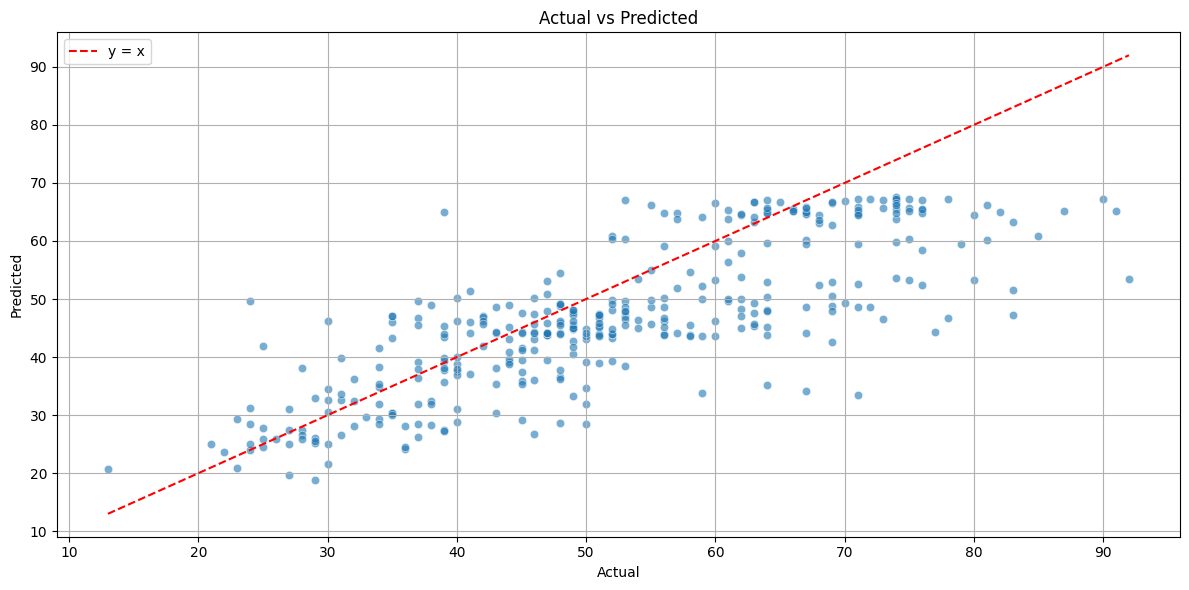

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:], y=y_pred_best, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

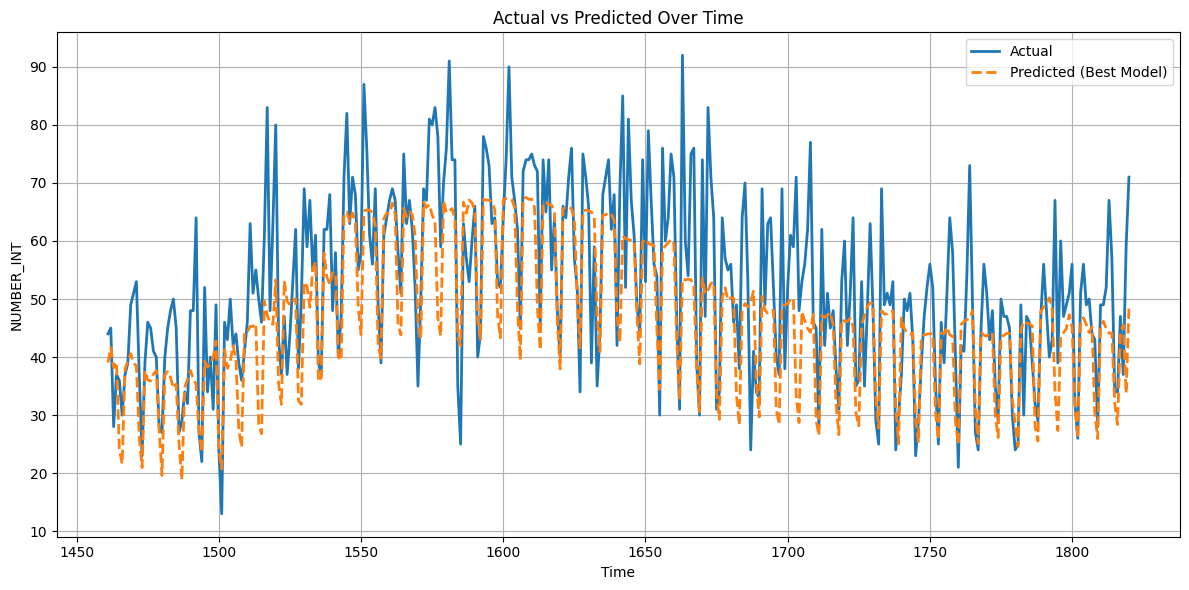

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index, y_val.values, label='Actual', linewidth=2)
plt.plot(y_val.index, y_pred_best, label='Predicted (Best Model)', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title(f'Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 30d

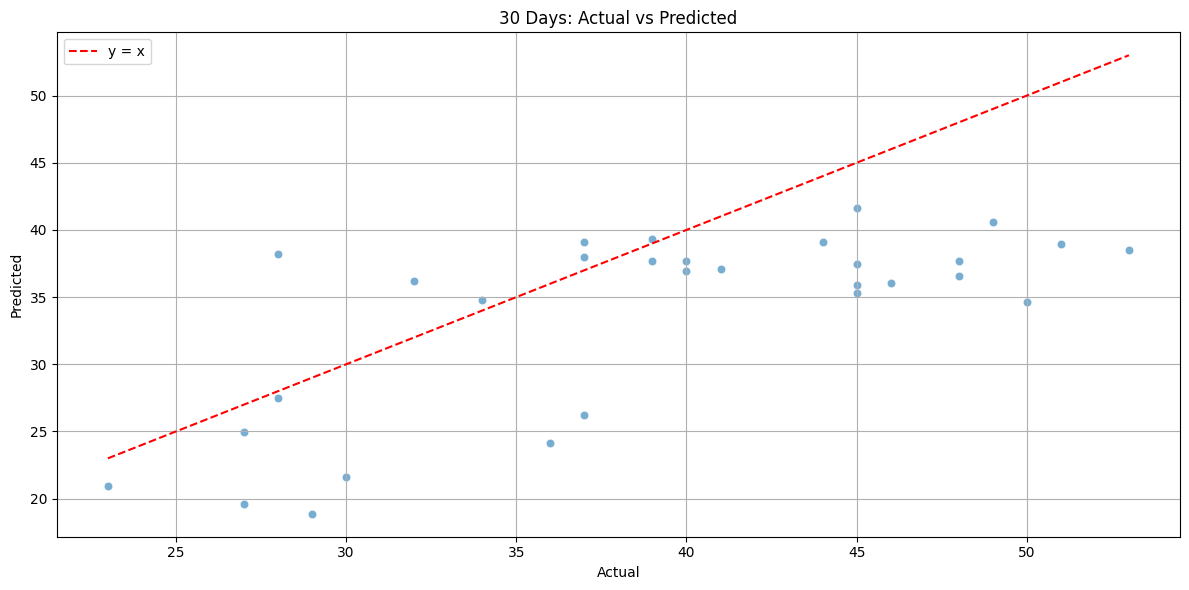

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_val[:30], y=y_pred_best[:30], alpha=0.6)
plt.plot([y_val[:30].min(), y_val[:30].max()], [y_val[:30].min(), y_val[:30].max()], color='red', linestyle='--', label='y = x')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('30 Days: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


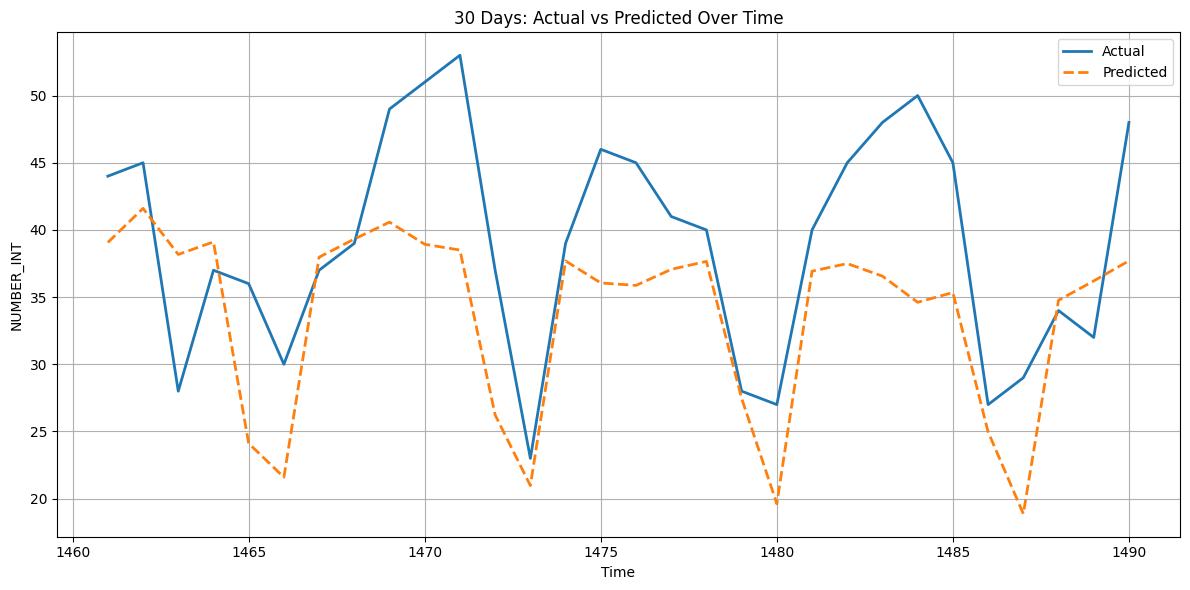

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.index[:30], y_val[:30].values, label='Actual', linewidth=2)
plt.plot(y_val.index[:30], y_pred_best[:30], label='Predicted', linewidth=2, linestyle='--')
plt.xlabel('Time')
plt.ylabel('NUMBER_INT')
plt.title('30 Days: Actual vs Predicted Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

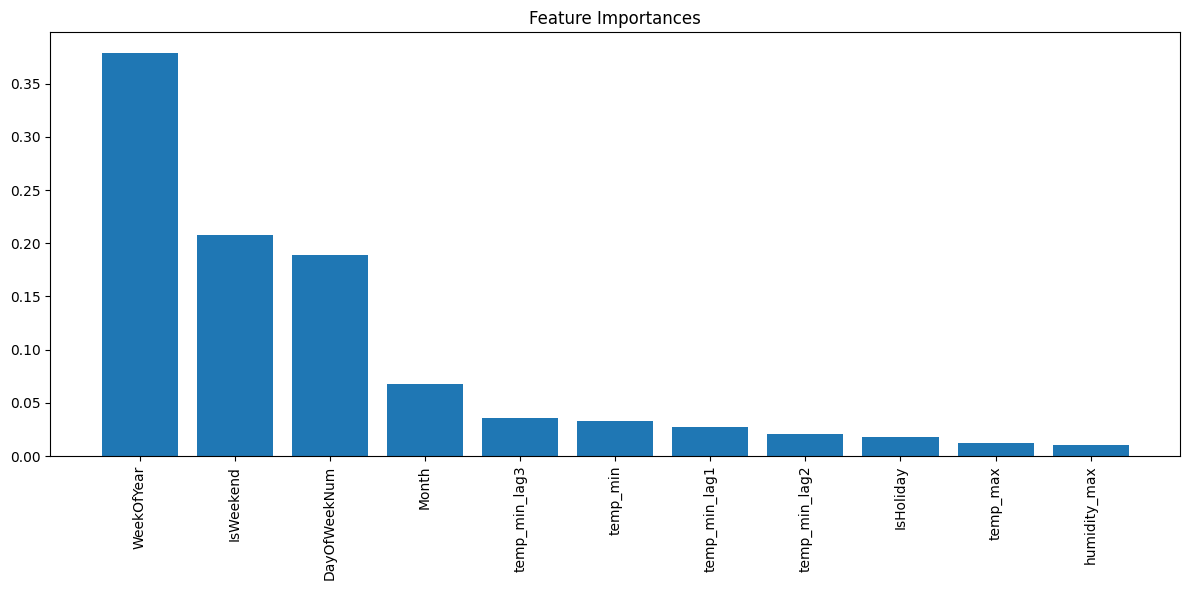

In [28]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()